# Data Sets from the Literature

The following data sets were obtained from the literature.

## Solvolysis in water/solvent mixture

Data for the solvolysis of benzyl chloride were obtained from..

"Sur un Parallélisme Entre la Mobilité de L'hydrogène du Noyau Benzénique et Celle du Chlore de la Chaîne Latérale" S.C.J. Olivier, *Recl. Trav. Chim. Pays-Bas*, **1930**, *49*, 697-704. https://doi.org/10.1002/recl.19300490803

Rates of hydrolysis are reported for substituted benzyl chlorides in the following conditions.

1. 48\% ethanol, 52\% water, $30 ^\circ C$
2. 48\% ethanol, 52\% water, $83 ^\circ C$
3. 50\% Acetone, 50\% water, $30 ^\circ C$
4. 50\% Acetone, 50\% water, $60 ^\circ C$


**Note:** 
- No acid or base added.  
- Rate constants are first-order rate of in [BzCl] and reported in /$10^{-3} min^{-1}$.

### Cleaning Data Set

the code below will extract and clean the data from the database for use in  this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_14/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "sigma"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################
def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

Data_Set = "Table_5_Data.csv"

Filename = github_location + Data_Set

df1 = pd.read_csv(Filename,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 


display(df1)

,k_EtOH_30,k_EtOH_83,k_Acetone_30,k_Acetone_60
Substituent,,,,
H,0.11100,15.50,0.02250,0.460
p-CH3,1.04000,164.00,0.17300,4.000
o-CH3,0.55000,75.00,0.09800,1.890
m-CH3,0.14400,21.60,0.02780,0.550
p-Cl,0.05200,9.60,0.01260,0.268
o-Cl,NaN,5.50,0.00610,0.137
m-Cl,0.01520,3.68,0.00399,0.093
p-Br,0.04570,7.80,0.01100,0.234
o-Br,0.02360,4.44,0.00550,0.129


## Hammett Parameters from A. Williams
This table presents the Hammett $\sigma$ LFER values collected values presented in the collection curated by A. Williams in his book, “Free Energy Relationships in Organic and Bio-organic Chemistry”, *The Royal Society of Chemistry, Cambridge*, **2003**, pp 258-277. https://doi.org/10.1039/9781847550927.

 The data series are as follows:
 
- **Substituent**
     - The code of the substituent and the **index series**. Hopefully we will use a unique code for each substituent that will apply across all these data tables. Students should use data cleaning methods to track down duplicate data and mismatched codes.
- **sigma**
    - The Hammett $\sigma$ value
- **s_plus**
    - The Brown-Okamoto $\sigma_p^+$ value
- **s_minus**
    - The Brown-Okamoto $\sigma_p^-$ value
- **Page**
    - The page number in book. This is included to enable faster checking of the data by other students (all errors are intentional - to see if they are paying attention.)
    
**Note:** You may also use the Hansch data set available from the GitHub page.

### Cleaning Data Set

the code below will extract and clean the data from the database for use in  this analysis.

In [2]:
################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_Data = "LFER_HanschLeoTaft.csv"   # Choose which set of Hammett parameters you prefer
#LFER_Data = "LFER_Williams.csv"

Filename = github_location_LFER_tables + LFER_Data

df2 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(df)

########################################################
### Fill across sigma values and select substituents ###
########################################################

df2 = fill_sigma(df2)
#display(df2)

###############################
### Remove unneeded columns ###
###############################
 
df2.drop(labels = ["TABLE V", "TABLE I"],    #Trim "LFER_HanschLeoTaft.csv" data
#df2.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
        axis = 1,
        inplace = True)
#print(df2)
#df2.sort_values(by=['sigma'], inplace=True)
#display(df2)

## Combine Data Sets

Both data sets are indexed by "Substituent". The code below will combine the two data sets according to "Substituent" and take the intersection of the sets.

In [3]:
result = pd.concat([df2, df1], axis=1, join="inner")
display(result)

,sigma,s_plus,s_minus,k_EtOH_30,k_EtOH_83,k_Acetone_30,k_Acetone_60
Substituent,,,,,,,
m-Br,0.39,0.39,0.39,0.01470,3.34,0.00390,0.093
p-Br,0.23,0.15,0.25,0.04570,7.80,0.01100,0.234
m-CH3,-0.07,-0.07,-0.07,0.14400,21.60,0.02780,0.550
p-CH3,-0.17,-0.31,-0.17,1.04000,164.00,0.17300,4.000
m-Cl,0.37,0.37,0.37,0.01520,3.68,0.00399,0.093
p-Cl,0.23,0.11,0.19,0.05200,9.60,0.01260,0.268
H,0.00,0.00,0.00,0.11100,15.50,0.02250,0.460
m-I,0.35,0.35,0.35,0.01520,3.11,0.00396,0.089
p-I,0.18,0.14,0.27,0.04140,7.40,0.01000,0.215


## Calculations

The rates are reported in units of $10^{-3} min^{-1}$.  They will be converted to $min^{-1}$ by multiplying the values by $10^{-3}$. Then the log values will be calculated for the log-log Hammett plots.

See the code below.

In [4]:
result_copy = result.copy()  # copy the data set into a new data structure so the original will not change

result_copy["k_EtOH_30"] = result_copy["k_EtOH_30"]*(10**(-3))
result_copy["k_EtOH_83"] = result_copy["k_EtOH_83"]*(10**(-3))
result_copy["k_Acetone_30"] = result_copy["k_Acetone_30"]*(10**(-3))
result_copy["k_Acetone_60"] = result_copy["k_Acetone_60"]*(10**(-3))
result_copy["log_k_EtOH_30"] = np.log10(result_copy["k_EtOH_30"])
result_copy["log_k_EtOH_83"] = np.log10(result_copy["k_EtOH_83"])
result_copy["log_k_Acetone_30"] = np.log10(result_copy["k_Acetone_30"])
result_copy["log_k_Acetone_60"] = np.log10(result_copy["k_Acetone_60"])
display(result_copy)

#result_copy.drop(labels = ["p-CH3"], axis = 0, inplace = True)

,sigma,s_plus,s_minus,k_EtOH_30,k_EtOH_83,k_Acetone_30,k_Acetone_60,log_k_EtOH_30,log_k_EtOH_83,log_k_Acetone_30,log_k_Acetone_60
Substituent,,,,,,,,,,,
m-Br,0.39,0.39,0.39,0.000015,0.00334,0.000004,0.000093,-4.832683,-2.476254,-5.408935,-4.031517
p-Br,0.23,0.15,0.25,0.000046,0.00780,0.000011,0.000234,-4.340084,-2.107905,-4.958607,-3.630784
m-CH3,-0.07,-0.07,-0.07,0.000144,0.02160,0.000028,0.000550,-3.841638,-1.665546,-4.555955,-3.259637
p-CH3,-0.17,-0.31,-0.17,0.001040,0.16400,0.000173,0.004000,-2.982967,-0.785156,-3.761954,-2.397940
m-Cl,0.37,0.37,0.37,0.000015,0.00368,0.000004,0.000093,-4.818156,-2.434152,-5.399027,-4.031517
p-Cl,0.23,0.11,0.19,0.000052,0.00960,0.000013,0.000268,-4.283997,-2.017729,-4.899629,-3.571865
H,0.00,0.00,0.00,0.000111,0.01550,0.000022,0.000460,-3.954677,-1.809668,-4.647817,-3.337242
m-I,0.35,0.35,0.35,0.000015,0.00311,0.000004,0.000089,-4.818156,-2.507240,-5.402305,-4.050610
p-I,0.18,0.14,0.27,0.000041,0.00740,0.000010,0.000215,-4.383000,-2.130768,-5.000000,-3.667562


Closed circles
48% EtOH, 30 deg
slope = -2.146 +/- 0.247
intercept = -3.848 +/- 0.097
rsq = 0.893
p = 1.15e-05

Open circles
48% EtOH, 83 deg
slope = -1.907 +/- 0.245
intercept = -1.637 +/- 0.096
rsq = 0.871
p = 2.73e-05

Closed squares
50% Acetone, 30 deg
slope = -1.791 +/- 0.245
intercept = -4.549 +/- 0.096
rsq = 0.856
p = 4.47e-05

Open squares
50% Acetone, 60 deg
slope = -1.730 +/- 0.256
intercept = -3.220 +/- 0.100
rsq = 0.836
p = 8.21e-05



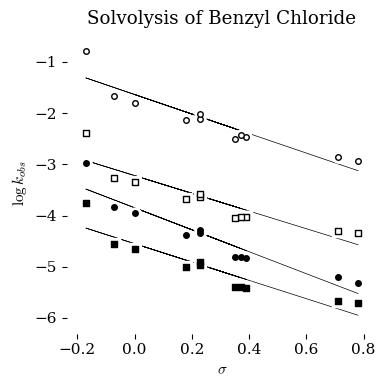

scipy.stats._stats_mstats_common.LinregressResult

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

sigma = sigmatype 


def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

style_name = github_location_styles + style
plt.style.use(style_name)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(
          title="Solvolysis of Benzyl Chloride",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


##############################
x = result_copy[sigma]
y = result_copy["log_k_EtOH_30"]

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="black", marker='o', zorder=3)

print("Closed circles")
Report("48% EtOH, 30 deg", linfit)

##############################
x = result_copy[sigma]
y = result_copy["log_k_EtOH_83"]

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', linewidths=1, edgecolors="black", zorder=3)

print("Open circles")
Report("48% EtOH, 83 deg", linfit)

##############################
x = result_copy[sigma]
y = result_copy["log_k_Acetone_30"]

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", marker='s', zorder=3)
ax.scatter(x,y, s=16, color="black", marker='s', zorder=3)

print("Closed squares")
Report("50% Acetone, 30 deg", linfit)

##############################
x = result_copy[sigma]
y = result_copy["log_k_Acetone_60"]

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
ax.scatter(x,y, s=64, color="white", marker='s', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='s', linewidths=1, edgecolors="black", zorder=3)

print("Open squares")
Report("50% Acetone, 60 deg", linfit)

plt.show()
fig.savefig("plot5.pdf") 

type(linfit)